In [9]:
%run utils.ipynb

In [112]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import FactorAnalysis
from sklearn.metrics import f1_score
from time import time
import scipy
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.model_selection import cross_val_score
from matplotlib.ticker import MaxNLocator

classifier = MLPClassifier(solver="lbfgs", activation="logistic", hidden_layer_sizes=(40,))

def grid_search_results(data, reducer):
    n_components = data['n_features']
    n_components_range = list(range(1,n_components+1))
    pipe = Pipeline(steps=[('reducer', reducer),('classifier',classifier)])
    gridSearch =  GridSearchCV(pipe,dict(reducer__n_components=n_components_range), cv=3, scoring="f1_weighted")
    gridSearch.fit(data['X'], data['y'])
    results = gridSearch.cv_results_
    best_n = gridSearch.best_estimator_.named_steps['reducer'].n_components
    
    df = pd.DataFrame({
        'n_components': n_components_range,
        'mean_test_score': results['mean_test_score'],
        'mean_train_score': results['mean_train_score'],
        'mean_fit_time': results['mean_fit_time'],
        'best_n': [best_n] * n_components
    })
    return df    

def pca_scores(data):
    np.random.seed(5)
    pca = PCA()
    pca.fit(data['X'])
    return grid_search_results(data, pca)
    
def ica_scores(data):
    np.random.seed(5)
    ica = FastICA(n_components=data['n_features'])
    ica.fit(data['X'])
    return grid_search_results(data, ica)
    
def rp_scores(data):
    np.random.seed(5)
    rp = GaussianRandomProjection(n_components=data['n_features'])
    rp.fit(data['X'])
    return grid_search_results(data, rp)

def fa_scores(data):
    np.random.seed(5)
    fa = FactorAnalysis(max_iter=100)
    fa.fit(data['X'])
    return grid_search_results(data, fa)

data = cdata
pca = pca_scores(data)
pca.to_csv(f"./q4/pca_{data['name']}.csv", index=False)
ica = ica_scores(data)
ica.to_csv(f"./q4/ica_{data['name']}.csv", index=False)
rp = rp_scores(data)
rp.to_csv(f"./q4/rp_{data['name']}.csv", index=False)
fa = fa_scores(data)
fa.to_csv(f"./q4/fa_{data['name']}.csv", index=False)
          
          
data = wdata
pca = pca_scores(data)
pca.to_csv(f"./q4/pca_{data['name']}.csv", index=False)
ica = ica_scores(data)
ica.to_csv(f"./q4/ica_{data['name']}.csv", index=False)
rp = rp_scores(data)
rp.to_csv(f"./q4/rp_{data['name']}.csv", index=False)
fa = fa_scores(data)
fa.to_csv(f"./q4/fa_{data['name']}.csv", index=False)

In [124]:
from sklearn.model_selection import cross_val_score
from matplotlib.ticker import MaxNLocator

data = cdata

start_time = time()
_score = np.mean(cross_val_score(classifier, data['X'], data['y'], scoring='f1_weighted'))
_time = time() - start_time

print(f"Time: {_time}")
print(f"Accuracy Score: {_score}")
print(classifier.get_params())

cdata['_time'] = _time
cdata['_score'] = _score

Time: 0.46045780181884766
Accuracy Score: 0.6908883272807999
{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (40,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [125]:
from sklearn.model_selection import cross_val_score
from matplotlib.ticker import MaxNLocator

data = wdata

start_time = time()
_score = np.mean(cross_val_score(classifier, data['X'], data['y'], scoring='f1_weighted'))
_time = time() - start_time

print(f"Time: {_time}")
print(f"Accuracy Score: {_score}")
print(classifier.get_params())

wdata['_time'] = _time
wdata['_score'] = _score

Time: 1.9087049961090088
Accuracy Score: 0.4990257654243244
{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (40,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


<IPython.core.display.Javascript object>


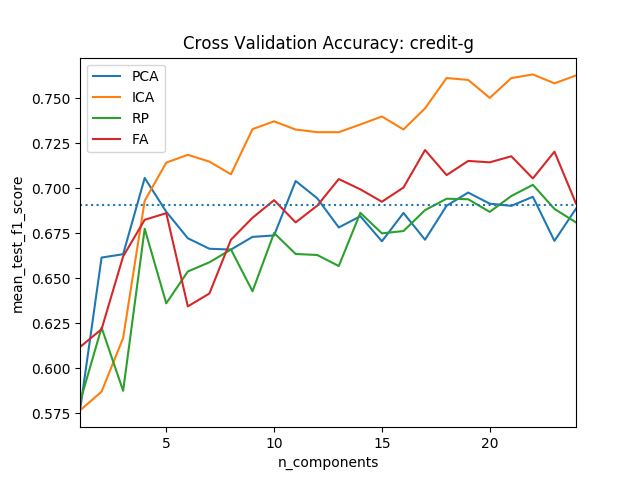

<IPython.core.display.Javascript object>


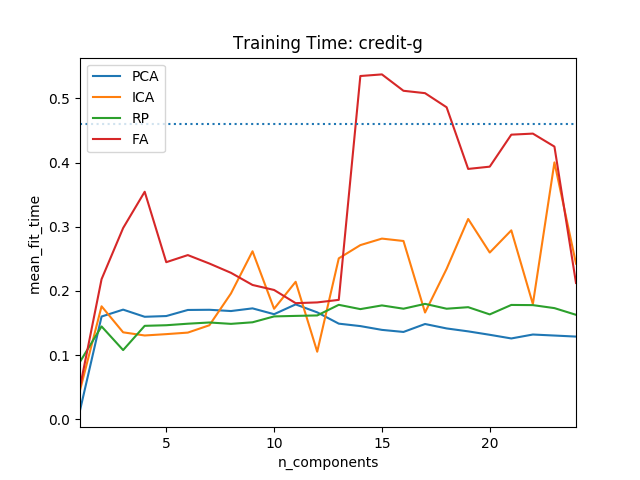

In [126]:
data = cdata

df_pca = pd.read_csv(f"./q4/pca_{data['name']}.csv")
df_ica = pd.read_csv(f"./q4/ica_{data['name']}.csv")
df_rp = pd.read_csv(f"./q4/rp_{data['name']}.csv")
df_fa = pd.read_csv(f"./q4/fa_{data['name']}.csv")

fig, ax1 = plt.subplots()

df_pca.plot(x='n_components', y='mean_test_score',label='PCA',ax=ax1)
df_ica.plot(x='n_components', y='mean_test_score',label='ICA',ax=ax1)
df_rp.plot(x='n_components', y='mean_test_score',label='RP',ax=ax1)
df_fa.plot(x='n_components', y='mean_test_score',label='FA',ax=ax1)
ax1.axhline(y=data['_score'], linestyle=':')
ax1.set_ylabel("mean_test_f1_score")
ax1.set_title(f"Cross Validation Accuracy: {data['name']}")

fig, ax2 = plt.subplots()
df_pca.plot(x='n_components', y='mean_fit_time',label='PCA',ax=ax2)
df_ica.plot(x='n_components', y='mean_fit_time',label='ICA',ax=ax2)
df_rp.plot(x='n_components', y='mean_fit_time',label='RP',ax=ax2)
df_fa.plot(x='n_components', y='mean_fit_time',label='FA',ax=ax2)
ax2.axhline(y=data['_time'], linestyle=':')
ax2.set_ylabel("mean_fit_time ")
ax2.set_title(f"Training Time: {data['name']}")

plt.show()

<IPython.core.display.Javascript object>


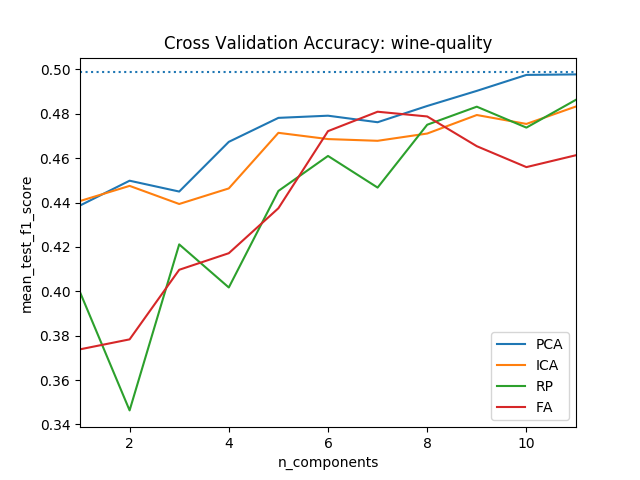

<IPython.core.display.Javascript object>


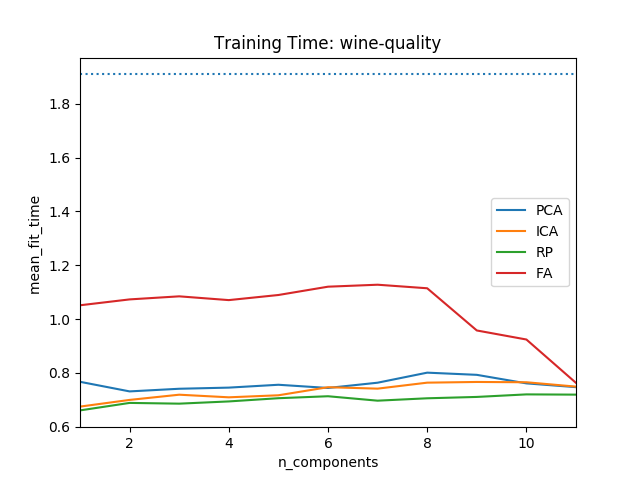

In [127]:
data = wdata

df_pca = pd.read_csv(f"./q4/pca_{data['name']}.csv")
df_ica = pd.read_csv(f"./q4/ica_{data['name']}.csv")
df_rp = pd.read_csv(f"./q4/rp_{data['name']}.csv")
df_fa = pd.read_csv(f"./q4/fa_{data['name']}.csv")

fig, ax1 = plt.subplots()

df_pca.plot(x='n_components', y='mean_test_score',label='PCA',ax=ax1)
df_ica.plot(x='n_components', y='mean_test_score',label='ICA',ax=ax1)
df_rp.plot(x='n_components', y='mean_test_score',label='RP',ax=ax1)
df_fa.plot(x='n_components', y='mean_test_score',label='FA',ax=ax1)
ax1.axhline(y=data['_score'], linestyle=':')
ax1.set_ylabel("mean_test_f1_score")
ax1.set_title(f"Cross Validation Accuracy: {data['name']}")

fig, ax2 = plt.subplots()
df_pca.plot(x='n_components', y='mean_fit_time',label='PCA',ax=ax2)
df_ica.plot(x='n_components', y='mean_fit_time',label='ICA',ax=ax2)
df_rp.plot(x='n_components', y='mean_fit_time',label='RP',ax=ax2)
df_fa.plot(x='n_components', y='mean_fit_time',label='FA',ax=ax2)
ax2.axhline(y=data['_time'], linestyle=':')
ax2.set_ylabel("mean_fit_time ")
ax2.set_title(f"Training Time: {data['name']}")

plt.show()